# **Text Classification**
By Hamna Mustafa - hbm170002


In [ ]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd
import seaborn as sb

## Data Preprocessing

I got the following dataset from Kaggle: https://www.kaggle.com/datasets/jonathanbesomi/superheroes-nlp-dataset


In [ ]:
# reading in my dataset 
df = pd.read_csv('/content/superheroes_nlp_dataset.csv')
print('rows and columns:', df.shape)
print(df.head())

rows and columns: (1450, 81)
            name               real_name               full_name  \
0        3-D Man     Delroy Garrett, Jr.     Delroy Garrett, Jr.   
1  514A (Gotham)             Bruce Wayne                     NaN   
2         A-Bomb  Richard Milhouse Jones  Richard Milhouse Jones   
3             Aa                      Aa                     NaN   
4     Aaron Cash              Aaron Cash              Aaron Cash   

  overall_score                                       history_text  \
0             6  Delroy Garrett, Jr. grew up to become a track ...   
1            10  He was one of the many prisoners of Indian Hil...   
2            20   Richard "Rick" Jones was orphaned at a young ...   
3            12  Aa is one of the more passive members of the P...   
4             5  Aaron Cash is the head of security at Arkham A...   

                                         powers_text  intelligence_score  \
0                                                NaN             

Looking at the shape of this dataset, we can see that there are many columns that are not text-based. This dataset can be used for many different NLP projects. However, for our text classification project, only 3 columns will be considered: creator, powers_text, and history_text

I will attempt to train a model that can guess the creator of the 'superhero' based on the powers_text and history_text column. 

Below, I am checking how many rows in the creator column are empty. 

In [ ]:
# checking how many rows in the creator column are null
df.isnull().sum()['creator']


139

I am only keeping the 3 columns mentioned above in my data frame and deleting all the rows in which creator is null.

In [ ]:
df = df[["history_text", "powers_text",'creator']]
df = df.dropna(subset=['creator'])
df.isnull().sum()

history_text     78
powers_text     346
creator           0
dtype: int64

As you can see, the powers_text column had way too many NA's. If I deleted all these rows, my dataframe would be become quite small. Thus, I decided to delete the powers_text column and train my model to predict the creator based on just the history-text column.

In [ ]:
# only keeping two columns
df = df[['history_text','creator']]

# deleting all rows where the history_text is empty
df = df.dropna(subset=['history_text'])
df.isnull().sum()

history_text    0
creator         0
dtype: int64

Plotting a graph showing a distribution of the target classes.

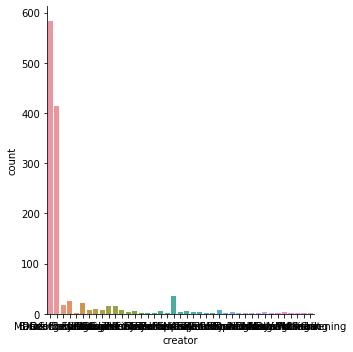

In [ ]:

sb.catplot(x='creator', kind='count', data=df)

As you can see, there are only two classes that have high counts: Marvel Comics and DC Comics. There are many other creators but their counts are very low. Hence, for my project, I decided to only consider the top two classes, as the count of the rest is low enough to be left out.  

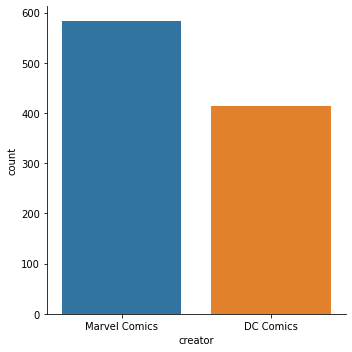

In [ ]:

# only keeping the rows in which the creator is Marvel Comics or DC Comics
indexAge = df[ (df['creator'] != 'Marvel Comics') & (df['creator'] != 'DC Comics') ].index
df.drop(indexAge , inplace=True)
df.head()

# plotting a graph that shows the distribution of the new target classes.
sb.catplot(x='creator', kind='count', data=df)

In [ ]:
features = df["history_text"]
print(features.head())
target = df["creator"]
print(target.head())

target = target.astype({"creator":'category'})



0    Delroy Garrett, Jr. grew up to become a track ...
1    He was one of the many prisoners of Indian Hil...
2     Richard "Rick" Jones was orphaned at a young ...
3    Aa is one of the more passive members of the P...
4    Aaron Cash is the head of security at Arkham A...
Name: history_text, dtype: object
0    Marvel Comics
1        DC Comics
2    Marvel Comics
3        DC Comics
4        DC Comics
Name: creator, dtype: object


## Splitting into Train and Test sets


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, train_size=0.8, random_state=1234)

## Tokenizing and Encoding Data

In [ ]:
# set up X and Y
num_labels = 2
vocab_size = 25000
batch_size = 100

# fit the tokenizer on the training data
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)

x_train_tok = tokenizer.texts_to_matrix(X_train, mode='tfidf')
x_test_tok = tokenizer.texts_to_matrix(X_test, mode='tfidf')

encoder = LabelEncoder()
encoder.fit(y_train)
y_train_tok = encoder.transform(y_train)
y_test_tok = encoder.transform(y_test)

# check shape
print("train shapes:", x_train_tok.shape, y_train_tok.shape)
print("test shapes:", x_test_tok.shape, y_test_tok.shape)
print("test first five labels:", y_test_tok[:5])

train shapes: (797, 25000) (797,)
test shapes: (200, 25000) (200,)
test first five labels: [0 0 1 1 1]


## Sequential Models

I tried two sequential models with different topologies. 

In [ ]:
vocab_size = 25000
model = models.Sequential()
model.add(layers.Dense(32, input_dim=vocab_size, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))
 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train_tok, y_train_tok,
                    epochs=50,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/50
23/23 [==============================] - 1s 18ms/step - loss: 0.5971 - accuracy: 0.6681 - val_loss: 0.4415 - val_accuracy: 0.7875
Epoch 2/50
23/23 [==============================] - 0s 11ms/step - loss: 0.2867 - accuracy: 0.9456 - val_loss: 0.3027 - val_accuracy: 0.9000
Epoch 3/50
23/23 [==============================] - 0s 12ms/step - loss: 0.1621 - accuracy: 0.9861 - val_loss: 0.2174 - val_accuracy: 0.9375
Epoch 4/50
23/23 [==============================] - 0s 12ms/step - loss: 0.0962 - accuracy: 0.9944 - val_loss: 0.1762 - val_accuracy: 0.9500
Epoch 5/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0630 - accuracy: 0.9958 - val_loss: 0.1549 - val_accuracy: 0.9500
Epoch 6/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0449 - accuracy: 0.9986 - val_loss: 0.1419 - val_accuracy: 0.9500
Epoch 7/50
23/23 [==============================] - 0s 12ms/step - loss: 0.0338 - accuracy: 1.0000 - val_loss: 0.1348 - val_accuracy: 0.9500
Epoch 8/50
23

### Accuracy of first sequential model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pred = model.predict(x_test_tok)
pred_labels = [1 if p>0.5 else 0 for p in pred]
Seq1accuracy = []
Seq1accuracy += [accuracy_score(y_test_tok, pred_labels)]
Seq1accuracy += [precision_score(y_test_tok, pred_labels)]
Seq1accuracy += [recall_score(y_test_tok, pred_labels)]
Seq1accuracy += [f1_score(y_test_tok, pred_labels)]
print('accuracy score: ', Seq1accuracy[0])
print('precision score: ', Seq1accuracy[1])
print('recall score: ', Seq1accuracy[2])
print('f1 score: ', Seq1accuracy[3])

7/7 [==============================] - 0s 4ms/step
accuracy score:  0.905
precision score:  0.9210526315789473
recall score:  0.9130434782608695
f1 score:  0.9170305676855894


## Second Sequential Model

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(25000,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(x_train_tok,
                    y_train_tok,
                    epochs=20,
                    
                    )

Epoch 1/20
25/25 [==============================] - 0s 10ms/step - loss: 1.2942e-04 - accuracy: 1.0000
Epoch 2/20
25/25 [==============================] - 0s 11ms/step - loss: 9.9926e-05 - accuracy: 1.0000
Epoch 3/20
25/25 [==============================] - 0s 10ms/step - loss: 7.6616e-05 - accuracy: 1.0000
Epoch 4/20
25/25 [==============================] - 0s 10ms/step - loss: 5.7728e-05 - accuracy: 1.0000
Epoch 5/20
25/25 [==============================] - 0s 9ms/step - loss: 4.4017e-05 - accuracy: 1.0000
Epoch 6/20
25/25 [==============================] - 0s 10ms/step - loss: 3.5131e-05 - accuracy: 1.0000
Epoch 7/20
25/25 [==============================] - 0s 10ms/step - loss: 2.8583e-05 - accuracy: 1.0000
Epoch 8/20
25/25 [==============================] - 0s 10ms/step - loss: 2.2764e-05 - accuracy: 1.0000
Epoch 9/20
25/25 [==============================] - 0s 10ms/step - loss: 1.8326e-05 - accuracy: 1.0000
Epoch 10/20
25/25 [==============================] - 0s 10ms/step - loss: 

### Accuracy of second sequential model

In [ ]:
pred2 = model2.predict(x_test_tok)
pred_labels2 = [1 if p>0.5 else 0 for p in pred2]
Seq2accuracy = []
Seq2accuracy += [accuracy_score(y_test_tok, pred_labels2)]
Seq2accuracy += [precision_score(y_test_tok, pred_labels2)]
Seq2accuracy += [recall_score(y_test_tok, pred_labels2)]
Seq2accuracy += [f1_score(y_test_tok, pred_labels2)]
print('accuracy score: ', Seq2accuracy[0])
print('precision score: ', Seq2accuracy[1])
print('recall score: ', Seq2accuracy[2])
print('f1 score: ', Seq2accuracy[3])

7/7 [==============================] - 0s 3ms/step
accuracy score:  0.885
precision score:  0.896551724137931
recall score:  0.9043478260869565
f1 score:  0.9004329004329004


## CNN Model

In [ ]:
max_features = 25000
maxlen = 25000
modelCNN = models.Sequential()
modelCNN.add(layers.Embedding(max_features, 128, input_length=maxlen)) 
modelCNN.add(layers.Conv1D(32, 7, activation='relu')) 
modelCNN.add(layers.MaxPooling1D(5)) 
modelCNN.add(layers.Conv1D(32, 7, activation='relu')) 
modelCNN.add(layers.GlobalMaxPooling1D())
modelCNN.add(layers.Dense(1))


In [ ]:
modelCNN.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),  # set learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history3 = modelCNN.fit(x_train_tok,
                    y_train_tok,
                    epochs=10,
                    verbose = 1,
                    validation_split=0.1)

Epoch 1/10
23/23 [==============================] - 158s 7s/step - loss: 1.0339 - accuracy: 0.4142 - val_loss: 0.7780 - val_accuracy: 0.4000
Epoch 2/10
23/23 [==============================] - 156s 7s/step - loss: 0.7113 - accuracy: 0.5091 - val_loss: 0.6652 - val_accuracy: 0.5875
Epoch 3/10
23/23 [==============================] - 127s 5s/step - loss: 0.6653 - accuracy: 0.5983 - val_loss: 0.6575 - val_accuracy: 0.6500
Epoch 4/10
23/23 [==============================] - 123s 5s/step - loss: 0.6618 - accuracy: 0.6067 - val_loss: 0.6568 - val_accuracy: 0.6500
Epoch 5/10
23/23 [==============================] - 120s 5s/step - loss: 0.6604 - accuracy: 0.6025 - val_loss: 0.6590 - val_accuracy: 0.6375
Epoch 6/10
23/23 [==============================] - 122s 5s/step - loss: 0.6598 - accuracy: 0.6011 - val_loss: 0.6561 - val_accuracy: 0.6500
Epoch 7/10
23/23 [==============================] - 123s 5s/step - loss: 0.6574 - accuracy: 0.6067 - val_loss: 0.6577 - val_accuracy: 0.6500
Epoch 8/10
23

### Accuracy of CNN Model

In [ ]:
predCNN = modelCNN.predict(x_test_tok)
pred_labelsCNN = [1 if p>0.5 else 0 for p in predCNN]
CNNaccuracy = []
CNNaccuracy += [accuracy_score(y_test_tok, pred_labelsCNN)]
CNNaccuracy += [precision_score(y_test_tok, pred_labelsCNN)]
CNNaccuracy += [recall_score(y_test_tok, pred_labelsCNN)]
CNNaccuracy += [f1_score(y_test_tok, pred_labelsCNN)]
print('accuracy score: ', CNNaccuracy[0])
print('precision score: ', CNNaccuracy[1])
print('recall score: ', CNNaccuracy[2])
print('f1 score: ', CNNaccuracy[3])

7/7 [==============================] - 7s 972ms/step
accuracy score:  0.595
precision score:  0.5934065934065934
recall score:  0.9391304347826087
f1 score:  0.7272727272727273


# Embedding Approach

In [ ]:

# set up the Embedding layer in a Sequential model

modelEmb = models.Sequential()
modelEmb.add(layers.Embedding(max_features, 8, input_length=maxlen))
modelEmb.add(layers.Flatten())
modelEmb.add(layers.Dense(16, activation='relu', input_shape=(25000,)))
modelEmb.add(layers.Dense(16, activation='relu'))
modelEmb.add(layers.Dense(1, activation='sigmoid'))

modelEmb.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
modelEmb.summary()

historyEmb = modelEmb.fit(x_train_tok, y_train_tok, epochs=10, validation_split=0.1)


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 25000, 8)          200000    
                                                                 
 flatten_5 (Flatten)         (None, 200000)            0         
                                                                 
 dense_26 (Dense)            (None, 16)                3200016   
                                                                 
 dense_27 (Dense)            (None, 16)                272       
                                                                 
 dense_28 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,400,305
Trainable params: 3,400,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
23/23 [=========================

### Accuracy of Embedding Approach

In [ ]:
predEmb = modelEmb.predict(x_test_tok)
pred_labelsEmb = [1 if p>0.5 else 0 for p in predEmb]
Embaccuracy = []
Embaccuracy += [accuracy_score(y_test_tok, pred_labelsEmb)]
Embaccuracy += [precision_score(y_test_tok, pred_labelsEmb)]
Embaccuracy += [recall_score(y_test_tok, pred_labelsEmb)]
Embaccuracy += [f1_score(y_test_tok, pred_labelsEmb)]
print('accuracy score: ', Embaccuracy[0])
print('precision score: ', Embaccuracy[1])
print('recall score: ', Embaccuracy[2])
print('f1 score: ', Embaccuracy[3])

7/7 [==============================] - 0s 24ms/step
accuracy score:  0.875
precision score:  0.8260869565217391
recall score:  0.991304347826087
f1 score:  0.901185770750988


# Another Embedding Approach

In [ ]:

modelEmb2 = models.Sequential()
modelEmb2.add(layers.Embedding(max_features, 8, input_length=maxlen))
modelEmb2.add(layers.Flatten())
modelEmb2.add(layers.Dense(32, input_dim=vocab_size, kernel_initializer='normal', activation='relu'))
modelEmb2.add(layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))

modelEmb2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelEmb2.summary()

historyEmb2 = modelEmb2.fit(x_train_tok, y_train_tok, verbose=1,epochs=20, validation_split=0.1)



Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 25000, 8)          200000    
                                                                 
 flatten_7 (Flatten)         (None, 200000)            0         
                                                                 
 dense_33 (Dense)            (None, 32)                6400032   
                                                                 
 dense_34 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6,600,065
Trainable params: 6,600,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
23/23 [==============================] - 4s 112ms/step - loss: 0.6922 - accuracy: 0.5537 - val_loss: 0.6764 - val_accuracy: 0.6000
Epoch 2/20
23/23 [===============

### Accuracy of Second Embedding Approach

In [ ]:
predEmb2 = modelEmb2.predict(x_test_tok)
pred_labelsEmb2 = [1 if p>0.5 else 0 for p in predEmb2]
Emb2accuracy = []
Emb2accuracy += [accuracy_score(y_test_tok, pred_labelsEmb2)]
Emb2accuracy += [precision_score(y_test_tok, pred_labelsEmb2)]
Emb2accuracy += [recall_score(y_test_tok, pred_labelsEmb2)]
Emb2accuracy += [f1_score(y_test_tok, pred_labelsEmb2)]
print('accuracy score: ', Emb2accuracy[0])
print('precision score: ', Emb2accuracy[1])
print('recall score: ', Emb2accuracy[2])
print('f1 score: ', Emb2accuracy[3])

7/7 [==============================] - 0s 39ms/step
accuracy score:  0.9
precision score:  0.8991596638655462
recall score:  0.9304347826086956
f1 score:  0.9145299145299145


## Accuracy Table

In [ ]:
d = {
    'Sequential 1': Seq1accuracy, 'Sequential 2': Seq2accuracy,
    'CNN': CNNaccuracy, 'Embedding 1': Embaccuracy, 'Embedding 2': Emb2accuracy,
    }

print("Total Accuracies:\n")
tot_acc = pd.DataFrame(data=d)
tot_acc.insert(0, "Metrics", ["Accuracy", "Precision", "Recall", "F1"])
print(tot_acc.to_string(index=False))

Total Accuracies:

  Metrics  Sequential 1  Sequential 2      CNN  Embedding 1  Embedding 2
 Accuracy      0.905000      0.885000 0.595000     0.875000     0.900000
Precision      0.921053      0.896552 0.593407     0.826087     0.899160
   Recall      0.913043      0.904348 0.939130     0.991304     0.930435
       F1      0.917031      0.900433 0.727273     0.901186     0.914530


## Final Analysis

As can be seen from the above table, the very first sequential model performed the best. It had an accuracy 90.5% which was higher than all of other model's accuracies. The CNN approach ended up performing the worst and it also took a long time to train. It took about 20 minutes whereas the other models took barely a minute to train. 

Initially, I was getting even worse results with the CNN model. I was getting accuracies of about 40%. After changing the topology a few times, I was able to get it to 59% which still isn't that good. 

I did 2 sequential models because I wanted to try different topologies and see how they performed. I also did 2 models with embedding approaches for the same reason. In the second embedding approach, I kept everything the same as the the first sequential model, and just added an embedding layer. That gave me very good results as I was able to get an accuracy of 90%.

All in all, it seems that for my dataset, using a simple sequential model seemed to do the trick. I achieved the best metrics through it and it was very efficient time-wise as well.
